# Analysis - Olist

## Objective:
- Emphasis on analysis, in which we can offer concrete business proposals
- Focus:
    - Sales trend - propose when to offer discounts
    

## Data Pre-processing:
- handling of missing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('fivethirtyeight')

customers = pd.read_csv('data/olist_customers_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
products_translation = pd.read_csv('data/product_category_name_translation.csv')

In [2]:
print("Customer Dataset:")
print(customers.isnull().sum())
print()
print("Orders Dataset:")
print(orders.isnull().sum())
print()
print("Order items Dataset:")
print(order_items.isnull().sum())

Customer Dataset:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Orders Dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Order items Dataset:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [3]:
print("Product Dataset:")
print(products.isnull().sum())
print()
print("Order Payment Dataset:")
print(order_payments.isnull().sum())
print()
print("Product Translation Dataset:")
print(products_translation.isnull().sum())

Product Dataset:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Order Payment Dataset:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Product Translation Dataset:
product_category_name            0
product_category_name_english    0
dtype: int64


### Diving deeper in rows with missing values:
- Orders dataset and products dataset

### Order Dataset:

In [4]:
# total rows that have any missing value in `order` dataset
orders.isnull().any(axis = 1).sum()

2980

In [5]:
# checking columns with largest amount of null values
# rows where `order_delivered_customer_date` is null
print(orders.loc[orders['order_delivered_customer_date'].isnull()].isnull().sum())


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1782
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [6]:
orders.loc[orders['order_delivered_customer_date'].isnull()==False].isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
dtype: int64

- rows with missing values in `order_delivered_customer_date` account for 2965/2980 of the total rows with missing values
- Breakdown of other 15 rows:
    - 14 rows with missing values in `order_approved_at`
    - 1 row with missing value in `order_delivered_carrier_date`

In [7]:
# looking at other 15 rows to check for any problems
temp = orders.loc[orders['order_delivered_customer_date'].isnull()==False]
temp[temp.isnull().any(axis = 1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


- Since, our analysis focuses on purchase patterns, we want to see if the rows with NaN relate to order status
    - Specifically, if the order is `canceled`

In [8]:
# checking to see if the rows with missing values relate to order status
print(orders[orders.isnull().any(axis=1)]['order_status'].value_counts())

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64


In [9]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

- The missing rows account for 619/625 of all orders that were `canceled`

In [10]:
# looking at the other 6 canceled orders
temp = orders.loc[orders['order_delivered_customer_date'].isnull()==False]
temp.loc[temp['order_status']=='canceled']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09 00:00:00
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 00:00:00
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29 00:00:00
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 00:00:00
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 00:00:00


Findings:
- Rows with missing values in `order_delivered_customer_date` account for 99.5% (2965/2980) of all rows with missing values
    - Of the 15 other rows with missing values:
        - 14 rows with missing values in `order_approved_at`
        - 1 row with missing value in `order_delivered_carrier_date`
- These rows with missing values account for 99% (619/625) of all canceled orders
    - There are no abnormalities with the other 6 rows
- These findings suggest that only 20% (619/2980) of all rows with missing values are canceled orders
    - So, there is no need to remove all rows with missing values
- Based on these findings, we decided to remove rows with canceled orders
    - However, we will remove them in analysis when joining with other datasets

In [11]:
# remove rows with canceled orders
#orders_cleaned = orders[orders['order_status']!='canceled']
#orders_cleaned['order_status'].value_counts()

### Product Dataset

In [12]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [13]:
# checking total missing rows
products.isnull().any(axis = 1).sum()

611

In [14]:
# see if rows with missing values in `category_name` account for majority of missing rows
products.loc[products['product_category_name'].isnull()].isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                1
product_length_cm               1
product_height_cm               1
product_width_cm                1
dtype: int64

In [15]:
products.loc[products['product_category_name'].isnull()].shape

(610, 9)

In [16]:
products.loc[products['product_weight_g'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Findings:
- Rows with missing category names account for 99.8% (610/611) of all missing rows
    - the other 1 row seems to be a product that just lacks other information
- As of now, we will not drop any missing rows
    - This is because, we do not know if these rows relate to the price of the orders

## Looking at how orders and products datasets relate to order_items
- this is important because the `order_items` include the price of the order, which is integral to our analysis

In [17]:
# only care about orders that have info about prices
orderItems = pd.merge(orders, order_items, on='order_id', how='inner')
orderItems.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [18]:
orderItems[orderItems.isnull().any(axis=1)]['order_status'].value_counts()

shipped        1185
canceled        535
invoiced        359
processing      357
delivered        24
unavailable       7
approved          3
Name: order_status, dtype: int64

- It seems there is price information about canceled orders
- However, since our analysis concerns demand/sales, it does not make sense to include canceled orders into account
- Thus, all canceled orders will be removed

In [19]:
productItemsOuter = pd.merge(products, order_items, on='product_id', how='outer')
productItemsOuter.isnull().sum()

product_id                       0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
order_id                         0
order_item_id                    0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

In [20]:
productItemsInner = pd.merge(products, order_items, on='product_id', how='inner')
productItemsInner.isnull().sum()

product_id                       0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
order_id                         0
order_item_id                    0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

- The increase in rows in missing values compared to that in the product datasets suggest that there were multiple products with missing values were ordered
- Importantly, these missing values do not relate with the `order_item_id` or `price` columns
- So these rows should not affect our analysis
- In addition, the inner and outer joins are the same.
    - This means that all products in the product datasets are ones that have been ordered

### Final Action
- only removed canceled orders from order dataset
- only inner join

In [21]:
orders_cleaned = orders[orders['order_status']!='canceled']
orders_cleaned['order_status'].value_counts()

delivered      96478
shipped         1107
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

### Transforming columns:

In [22]:
products['volume'] = products['product_length_cm']*products['product_height_cm']*products['product_width_cm']
productsTranslated = pd.merge(products, products_translation, on='product_category_name', how='inner')
orders_cleaned['order_purchase_timestamp'] = pd.to_datetime(orders_cleaned['order_purchase_timestamp'])

/var/folders/k1/ypk5p6h57154zss_y_50gngw0000gn/T/ipykernel_31154/47482902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_cleaned['order_purchase_timestamp'] = pd.to_datetime(orders_cleaned['order_purchase_timestamp'])


### Consistent Merging:
- orders -> order_payments (order_sales)
- orders -> order_items -> products (order_products)

In [23]:
order_sales = pd.merge(orders_cleaned, order_payments, on='order_id', how='inner')
orderItems = pd.merge(orders_cleaned, order_items, on='order_id', how='inner')
order_products = pd.merge(orderItems, productsTranslated, on='product_id', how='inner')
order_products = order_products.rename(columns={'product_category_name_english':'product_category'})

## Domain Specific Analysis:
- Product Demand - Time Series Analysis:
    - Sales, Amount
    - overall, by product category
- Payment Types

### Sales - Time Series Analysis

### Product Analysis by Sales/Volume:

In [24]:
# top 10 most popular product categories
order_products['product_category'].value_counts()[0:10]

bed_bath_table           11097
health_beauty             9634
sports_leisure            8590
furniture_decor           8298
computers_accessories     7781
housewares                6915
watches_gifts             5970
telephony                 4527
garden_tools              4328
auto                      4205
Name: product_category, dtype: int64

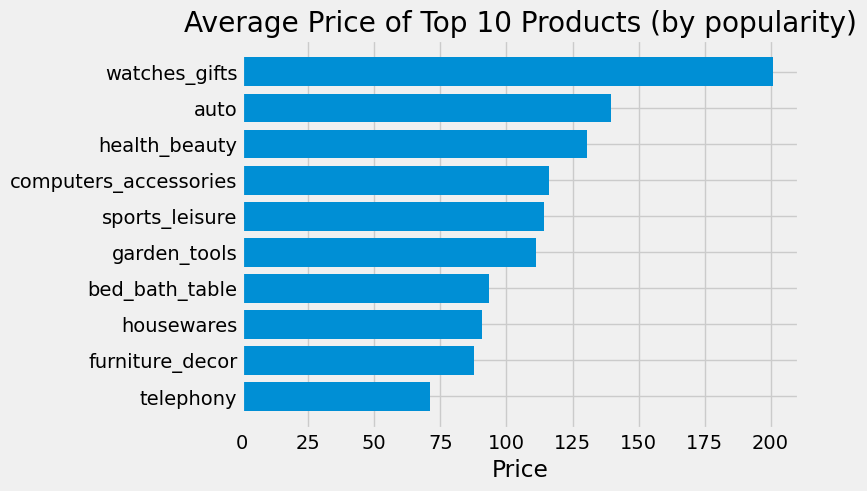

In [25]:
# average price/volume of the top 10 most popular products
top10 = order_products['product_category'].value_counts()[0:10].index
top10_avg = order_products.groupby('product_category').mean().loc[top10]
top10_avg_price = top10_avg['price'].sort_values(ascending=True)
top10_avg_volume = top10_avg['volume'].sort_values(ascending=True)
plt.barh(y=top10_avg_price.index,
        width=top10_avg_price)
plt.xlabel("Price")
plt.title("Average Price of Top 10 Products (by popularity)")
plt.show()


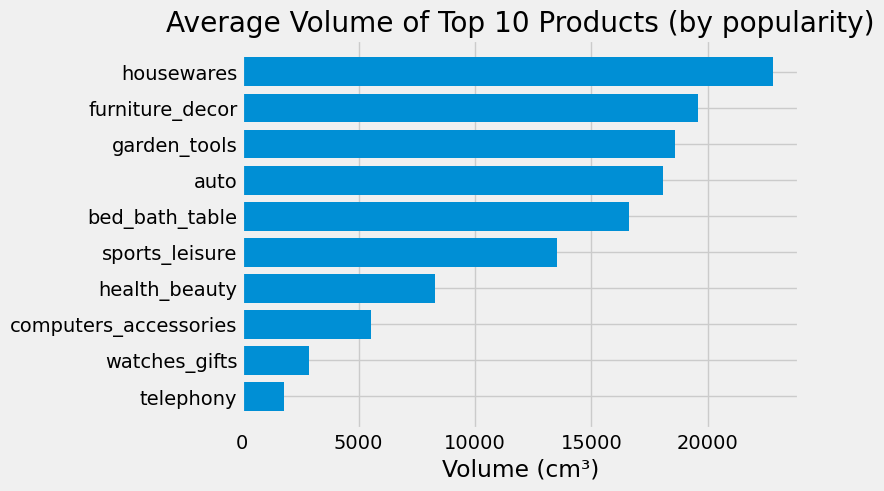

In [26]:
plt.barh(y=top10_avg_volume.index,
        width=top10_avg_volume)
plt.xlabel("{}cm\u00b3".format("Volume (") + ")")
plt.title("Average Volume of Top 10 Products (by popularity)")
plt.show()

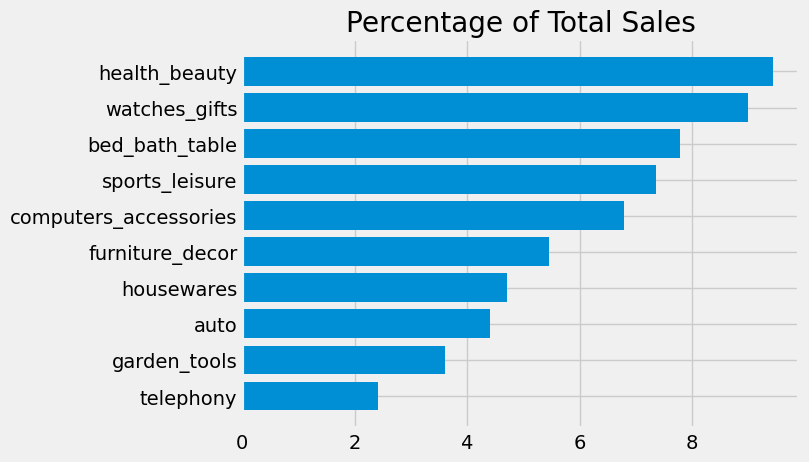

In [27]:
# percentage of total sales of top 10 most popular products
top10_total = order_products.groupby('product_category').sum().loc[top10, ['price','volume']]
top10_total_price = top10_total['price']
top10_total_price_perc = (top10_total_price/order_products['price'].sum())*100
top10_total_price_perc = top10_total_price_perc.sort_values()
plt.barh(y=top10_total_price_perc.index,
        width=top10_total_price_perc)
plt.xlabel
plt.title("Percentage of Total Sales")
plt.show()

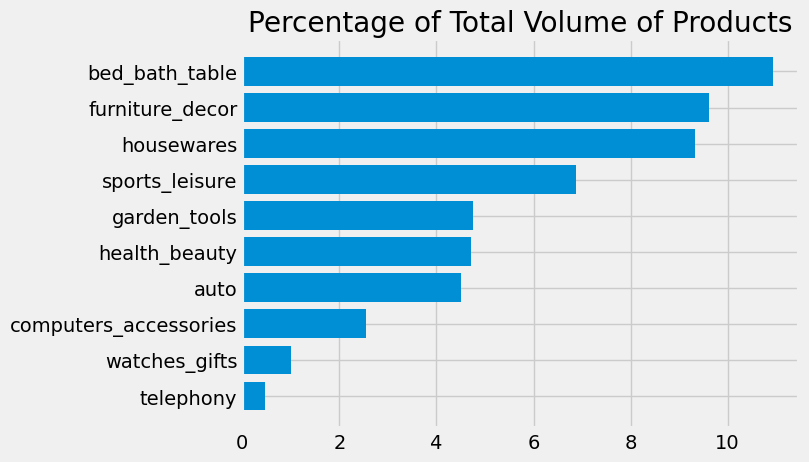

In [28]:
top10_total_volume = top10_total['volume']
top10_total_volume_perc = (top10_total_volume/order_products['volume'].sum())*100
top10_total_volume_perc = top10_total_volume_perc.sort_values()
plt.barh(y=top10_total_volume_perc.index,
        width=top10_total_volume_perc)
plt.xlabel
plt.title("Percentage of Total Volume of Products")
plt.show()

In [29]:
top10_total_price_perc.sum()

60.98113340829942

In [30]:
top10_total_volume_perc.sum()

54.74474655158878

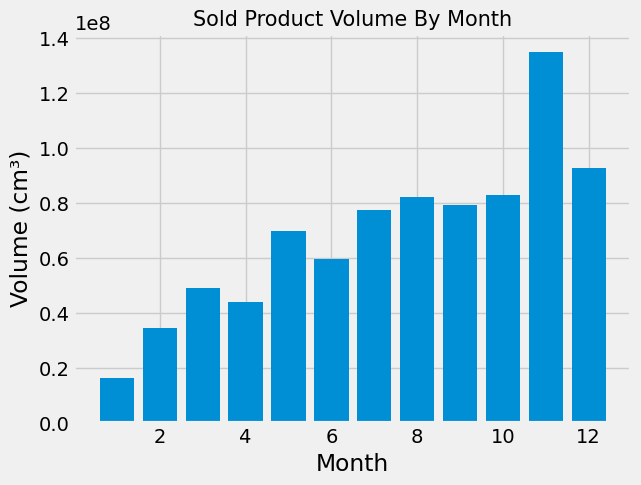

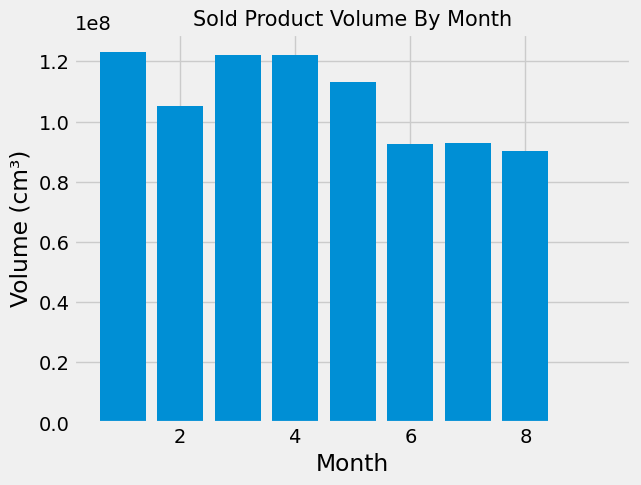

In [41]:
#Order Volume By Month
order_products.columns
order_products['order_purchase_month'] = order_products['order_purchase_timestamp'].dt.month
order_products['order_purchase_year'] = order_products['order_purchase_timestamp'].dt.year
order_vol_month_2017 = pd.DataFrame(order_products[order_products['order_purchase_year'] == 2017].groupby('order_purchase_month')['volume'].sum())
plt.bar(order_vol_month_2017.index, order_vol_month_2017['volume'])
plt.title("Sold Product Volume By Month", fontsize = 15)
plt.ylabel("{}cm\u00b3".format("Volume (") + ")")
plt.xlabel("Month")
plt.show()

order_vol_month_2018 = pd.DataFrame(order_products[order_products['order_purchase_year'] == 2018].groupby('order_purchase_month')['volume'].sum())
plt.bar(order_vol_month_2018.index, order_vol_month_2018['volume'])
plt.title("Sold Product Volume By Month", fontsize = 15)
plt.ylabel("{}cm\u00b3".format("Volume (") + ")")
plt.xlabel("Month")
plt.show()

## Findings:

### Sales:

### Products:

- the top 10 most popular products make up 60% of total sales
- the top 10 most popular products make up 54% of total volumes of products